<a href="https://colab.research.google.com/github/mingd00/ML/blob/main/CreateFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

display(train.head())
display(test.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


빈도 기반으로 범주화

In [ ]:
t = train.copy()
t['house_age_bin'] = pd.qcut(t['housing_median_age'], q=4)

train_house_age = t['house_age_bin'].value_counts().sort_index()
train_house_age

house_age_bin
(0.999, 18.0]    4414
(18.0, 29.0]     4397
(29.0, 37.0]     4150
(37.0, 52.0]     4039
Name: count, dtype: int64

값 기반으로 범주화

In [ ]:
bins = [0, 20, 40, 60]

t['house_age_value'] = pd.cut(t['housing_median_age'], bins=bins)

train_house_age = t['house_age_value'].value_counts().sort_index()
train_house_age

house_age_value
(0, 20]     5209
(20, 40]    8621
(40, 60]    3170
Name: count, dtype: int64

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

train_X = train.drop(['median_house_value', 'longitude', 'latitude'], axis=1)

# degree=2: 변수들 사이에 모든 가능한 2차 조합 포함하여 피처 생성
# bias=False: 모든 값이 1인 컬럼(상수항) 포함 X
poly = PolynomialFeatures(degree=2, include_bias=False)

features = poly.fit_transform(train_X)
# 새로 생성된 피처들의 이름을 get_feature_names_out을 통해 얻기
features_name = poly.get_feature_names_out(input_features=train_X.columns)

# 새로 생성된 피처를 포함하는 DataFrame 생성
features_df = pd.DataFrame(features, columns=features_name)
display(features_name)
display(features_df.head())

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income',
       'housing_median_age^2', 'housing_median_age total_rooms',
       'housing_median_age total_bedrooms',
       'housing_median_age population', 'housing_median_age households',
       'housing_median_age median_income', 'total_rooms^2',
       'total_rooms total_bedrooms', 'total_rooms population',
       'total_rooms households', 'total_rooms median_income',
       'total_bedrooms^2', 'total_bedrooms population',
       'total_bedrooms households', 'total_bedrooms median_income',
       'population^2', 'population households',
       'population median_income', 'households^2',
       'households median_income', 'median_income^2'], dtype=object)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,housing_median_age^2,housing_median_age total_rooms,housing_median_age total_bedrooms,housing_median_age population,...,total_bedrooms^2,total_bedrooms population,total_bedrooms households,total_bedrooms median_income,population^2,population households,population median_income,households^2,households median_income,median_income^2
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,225.0,84180.0,19245.0,15225.0,...,1646089.0,1302245.0,605576.0,1916.2888,1030225.0,479080.0,1516.0040,222784.0,704.9792,2.230841
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,361.0,145350.0,36119.0,21451.0,...,3613801.0,2146229.0,880163.0,3459.8200,1274641.0,522727.0,2054.7800,214369.0,842.6600,3.312400
2,17.0,720.0,174.0,333.0,117.0,1.6509,289.0,12240.0,2958.0,5661.0,...,30276.0,57942.0,20358.0,287.2566,110889.0,38961.0,549.7497,13689.0,193.1553,2.725471
3,14.0,1501.0,337.0,515.0,226.0,3.1917,196.0,21014.0,4718.0,7210.0,...,113569.0,173555.0,76162.0,1075.6029,265225.0,116390.0,1643.7255,51076.0,721.3242,10.186949
4,20.0,1454.0,326.0,624.0,262.0,1.9250,400.0,29080.0,6520.0,12480.0,...,106276.0,203424.0,85412.0,627.5500,389376.0,163488.0,1201.2000,68644.0,504.3500,3.705625


다항식 피처 생성 전 상관관계

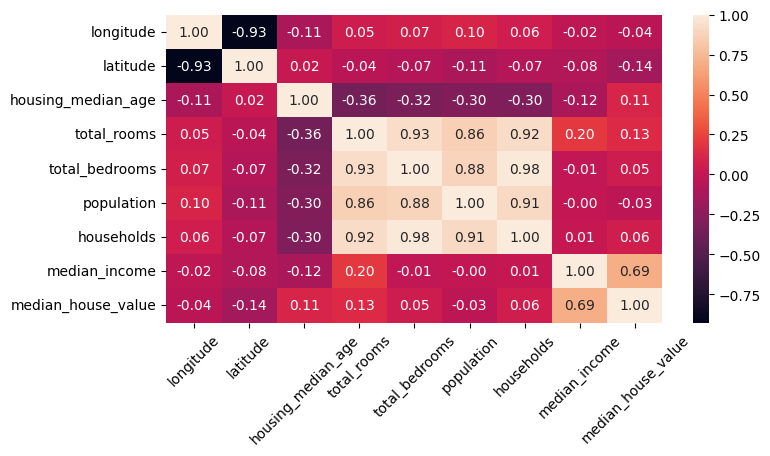

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 크기 지정
plt.figure(figsize=(8, 4))

# annot=True -> 각 셀의 수치 표기 O, fmt -> 소수점 지정
ax = sns.heatmap(train.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.show()

피처 생성 후 상관관계

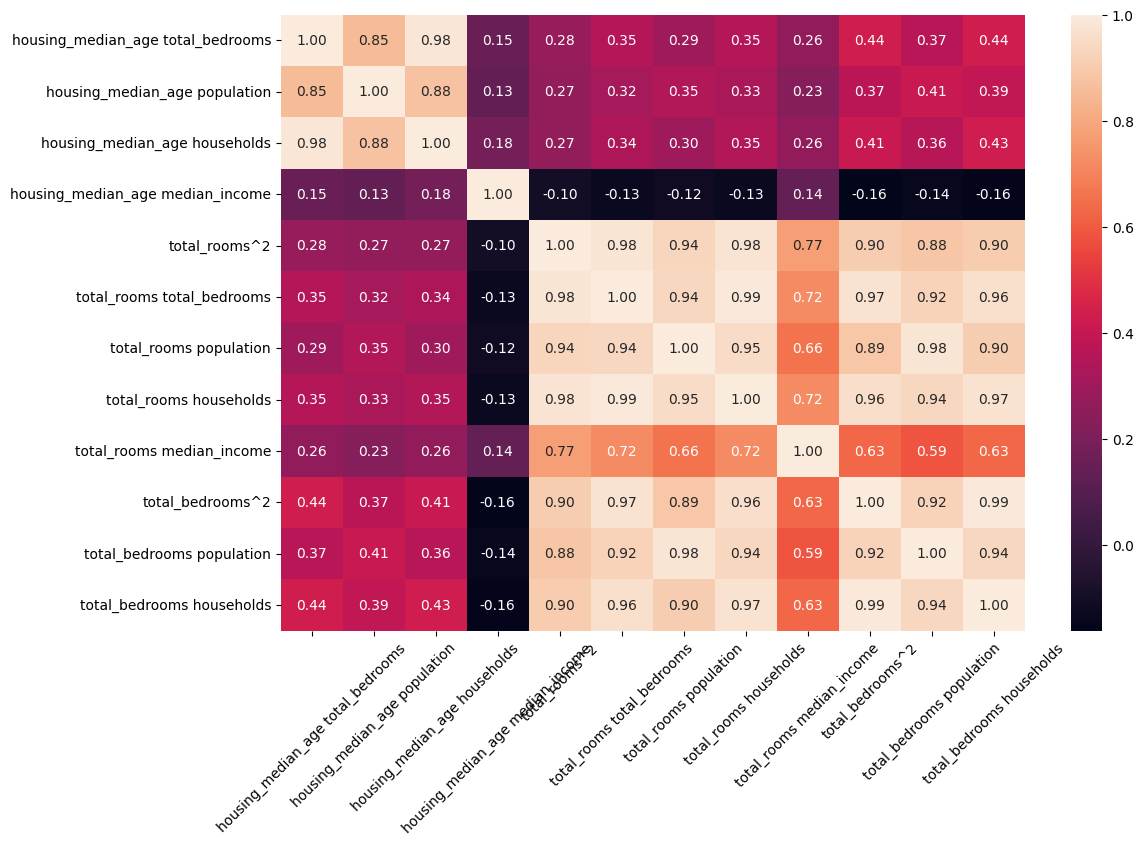

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 크기 지정
plt.figure(figsize=(12, 8))

# annot=True -> 각 셀의 수치 표기 O, fmt -> 소수점 지정
d = features_df.iloc[:, 8:20]
ax = sns.heatmap(d.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.show()

결정트리로 중요도 측정(분류 기법)

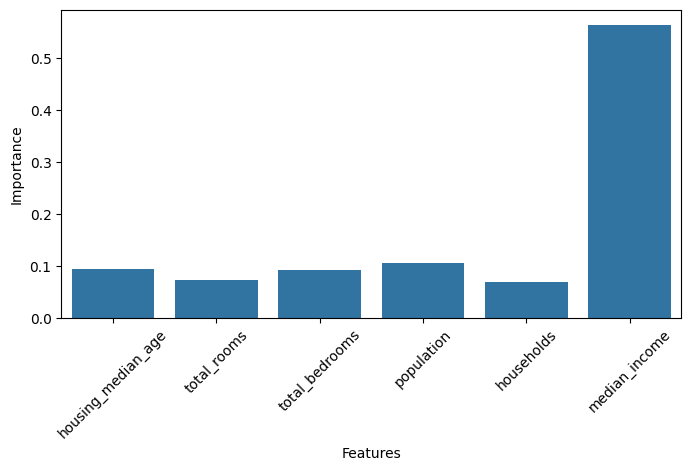

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 피처와 타켓변수 분리
X = train.drop(['median_house_value', 'longitude', 'latitude'], axis=1)
y = train['median_house_value']

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X, y)

# 피처 중요도 추출
importance_dt = dt.feature_importances_

# 피처 중요도 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=X.columns, y=importance_dt)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.show()


선형 회귀 모델로 중요도 측정(회귀 기법)

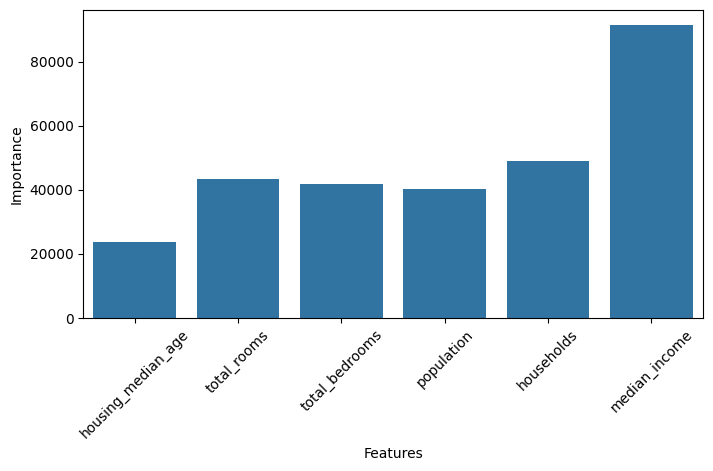

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_scaled, y)

# 피처의 가중치로 중요도 추출 -> 스케일링이 필수
importance_lr = abs(lr.coef_)

# 피처 중요도 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=X.columns, y=importance_lr)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.show()

피처 중요도 기준값 설정

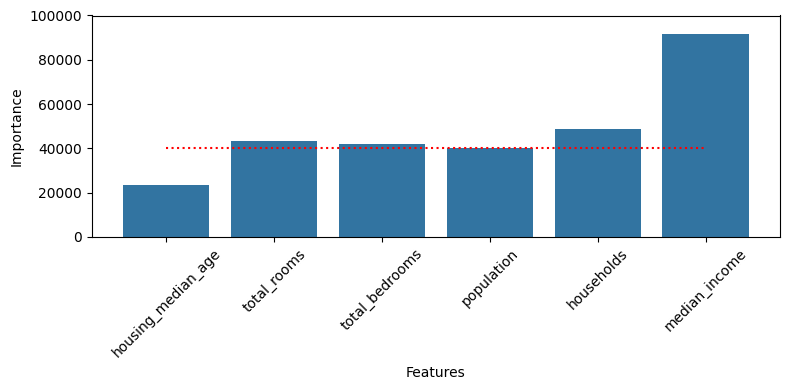

In [ ]:
# 피처 중요도 기준값, y축 limit값 설정
low_importance_criteria = 40000
ylimit_val = 100000

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=X.columns, y=importance_lr)
ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')


plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45) # x축 라벨 45도 회전
ax.set_ylim(0, ylimit_val)  # Y축 범위

plt.tight_layout()
plt.show()

중요도 이하의 값 제거하기

In [ ]:
low_importance_features = X.columns[importance_lr <= low_importance_criteria]
low_importance_features

Index(['housing_median_age'], dtype='object')

In [ ]:
new_X = X.drop(low_importance_features, axis=1)
new_X.head()

,total_rooms,total_bedrooms,population,households,median_income
0,5612.0,1283.0,1015.0,472.0,1.4936
1,7650.0,1901.0,1129.0,463.0,1.8200
2,720.0,174.0,333.0,117.0,1.6509
3,1501.0,337.0,515.0,226.0,3.1917
4,1454.0,326.0,624.0,262.0,1.9250
